In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)

#Cuando quiero un df, hay que poner display y si solamente quiero imprimir; print
display(df.head())  
print(df.shape)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


(2443651, 9)


In [3]:
#1. **Crosstab Analysis**:
#- Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
#2. **Statistical Tests**:
 #   - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#  - Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

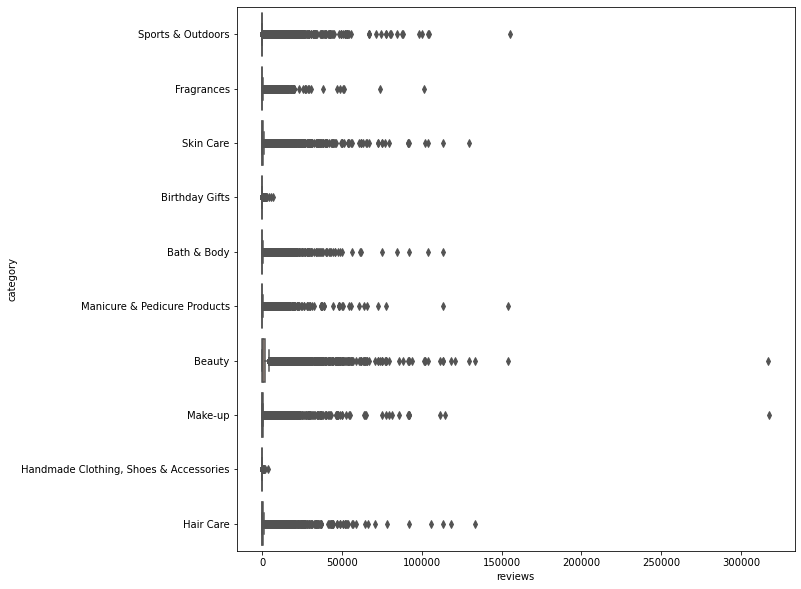

In [8]:
#3. **Box Plots**:
 #   - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#  - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
top10_categories = df['category'].value_counts().iloc[:10].index
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(data=df[ df['category'].isin(top10_categories)], x='reviews', y='category', palette="coolwarm", ax=axes);

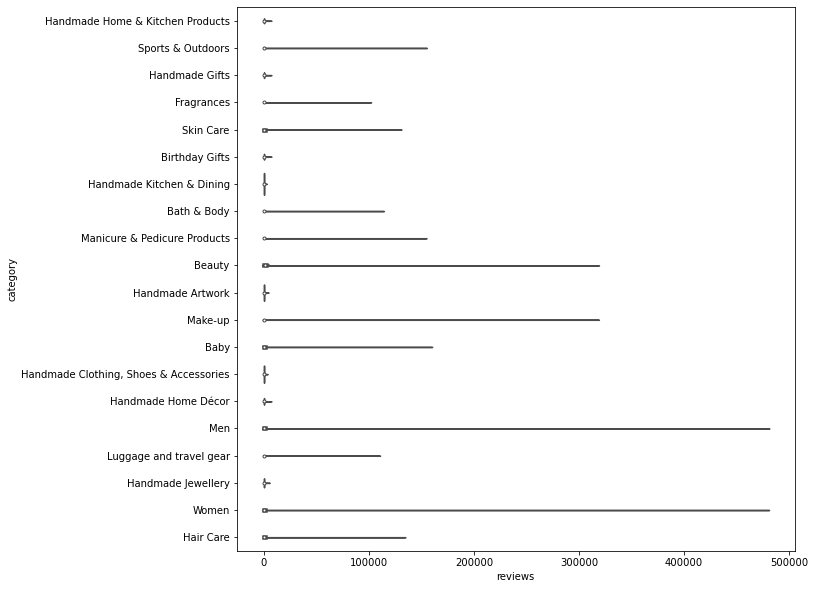

In [9]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#1. **Violin Plots**:
 #   - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
#  - Which product category tends to have the highest median price? Don't filter here by top categories.
top20_categories = df['category'].value_counts().iloc[:20].index
fig, axes = plt.subplots(figsize=(10,10))
sns.violinplot(data=df[ df['category'].isin(top20_categories)], x='reviews', y='category', palette="coolwarm", ax=axes);

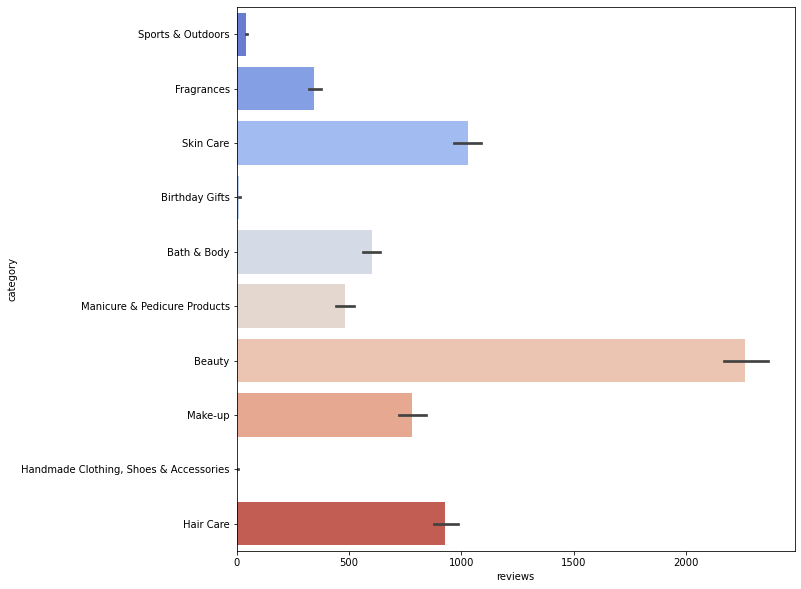

In [10]:
#2. **Bar Charts**:
 #   - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
  #  - Which product category commands the highest average price? Don't filter here by top categories.
top10_categories = df['category'].value_counts().iloc[:10].index
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(data=df[ df['category'].isin(top10_categories)], x='reviews', y='category', palette="coolwarm", ax=axes);

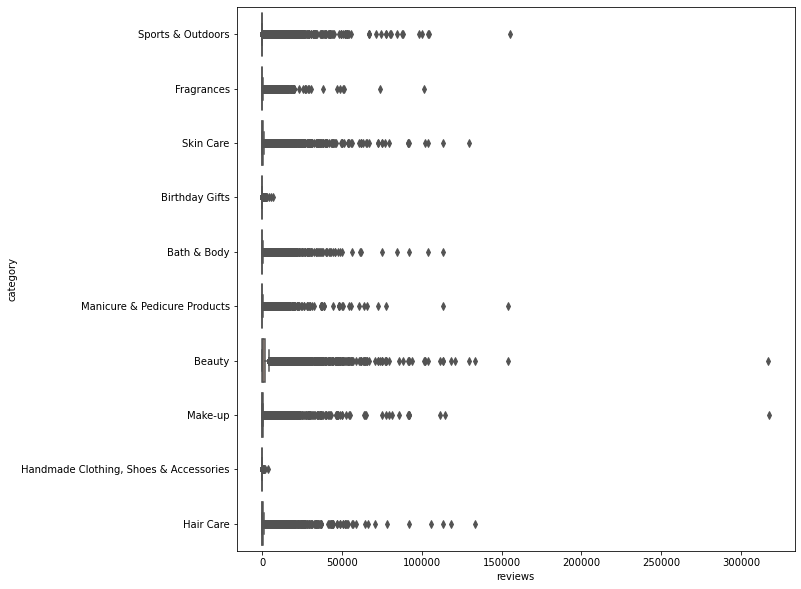

In [11]:

#3. **Box Plots**:
    # Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    # Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
top10_categories = df['category'].value_counts().iloc[:10].index
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(data=df[ df['category'].isin(top10_categories)], x='reviews', y='category', palette="coolwarm", ax=axes);

In [14]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings
#1. **Correlation Coefficients**:
 #   - Calculate the correlation coefficient between `price` and `stars`.
 #  - Is there a significant correlation between product price and its rating?
correlation = df['price'].corr(df['reviews'])

print(f"The correlation is: {correlation}")

The correlation is: -0.013171011618627326


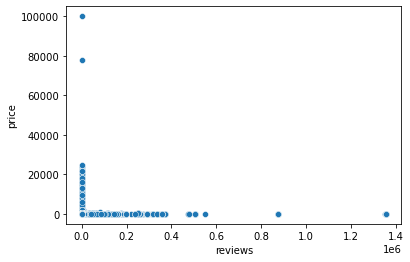

In [ ]:
#2. **Visualizations**:
#   - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# - Examine if product prices typically follow a normal distribution using a QQ plot.
sns.scatterplot(data=df, x='reviews', y='price'); 


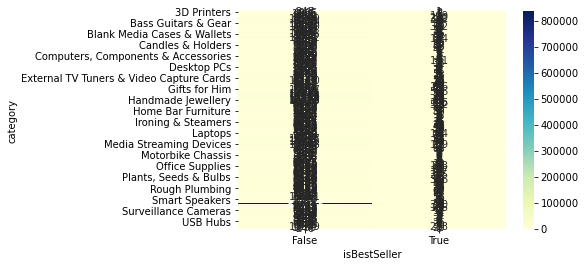

In [ ]:
#  - Use a correlation heatmap to visualize correlations between all numerical variables.
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d");

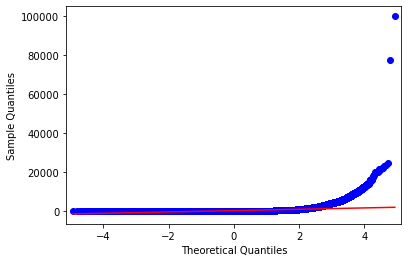

In [17]:
# - Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');